# Imports and initializations

In [1]:
# add our custom modules to the python import path
import sys
import os
sys.path.append(os.getcwd() + '/../../Client_modules/')

import mResSweepDouble
import mResRingDownDouble
from socProxy import makeProxy
import h5py
from PythonDrivers.control_atten import setatten
# import PythonDrivers.YOKOGS200 as YOKOGS200
import matplotlib.pyplot as plt
savePath = r'Z:\t1Team\Data\TALE04_BFF2_2023-04-13\RFSOC'
import numpy as np

# Python 3.7
# os.environ['PATH'] = os.getcwd() + '\\PythonDrivers' + os.pathsep + os.environ['PATH']
# Python 3.8 and newer
os.add_dll_directory(os.getcwd() + '/../../Client_modules/PythonDrivers')

Could not import QickSoc: No module named 'pynq'


<AddedDllDirectory('C:\\Users\\kevindc\\Documents\\GitHub\\ZCU216\\res_dev\\notebooks\\2023-04-13 TALE04_BFF2/../../Client_modules/PythonDrivers')>

In [2]:
# create proxy to ZCU216 board
soc, soccfg = makeProxy('192.168.1.105')
print(soccfg)

Pyro.NameServer PYRO:Pyro.NameServer@192.168.1.105:8888
myqick PYRO:obj_d89dfb308b024eb7abe51161f0dd6243@192.168.1.105:34563

QICK configuration:

	Board: ZCU216

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	7 signal generator channels:
	0:	axis_signal_gen_v4 - tProc output 1, envelope memory 65536 samples
		DAC tile 2, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	1:	axis_signal_gen_v4 - tProc output 2, envelope memory 65536 samples
		DAC tile 2, ch 1, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	2:	axis_signal_gen_v4 - tProc output 3, envelope memory 65536 samples
		DAC tile 2, ch 2, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	3:	axis_signal_gen_v4 - tProc output 4, envelope memory 65536 samples
		DAC tile 2, ch 3, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	4:	axis_signal_gen_v4 - tProc output 5, envelope memory 65536 samples
		DAC tile 3, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	5:	axis_signal_gen_v4 - tProc output 6, envelop

# Define sweep parameters for initial freq sweep

In [18]:
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [0.05,0.05]

# center freqs
# inputDict['res_f'] = [4.47503e3,
#                       4.71946e3]
inputDict['res_f'] = [4.913388e3,
                      5.054391e3]

# define numbers of points
inputDict['n_expts'] = 301  # number of points along the frequency axis
inputDict['n_rounds'] = 1  # number of times to sweep along the frequency axis
inputDict['n_reps'] = 50  # number of repetitions to take at each frequency point

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 100  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
inputDict['basePower'] = -30 # dBm
inputDict['gain'] = [18000, 22000]


In [ ]:
# Acquire decimated
# inputDict['res_f'] = [4.50e3,
#                       4.80e3]

# inputDict['power'] = inputDict['basePower']
# inputDict['adc_trig_offset'] = 1
# Instance = mResSweepDouble.ResSweep(path=savePath, prefix='data', inputDict=inputDict, soc=soc, soccfg=soccfg)
# data = mResSweepDouble.ResSweep.acquire_decimated(Instance, readout_length=1000, )
# mResSweepDouble.ResSweep.display_decimated(Instance, data)

# Acquire data

Frequencies out are: [4913.388, 5054.391] MHz


C:\Users\kevindc\Documents\GitHub\ZCU216\res_dev\notebooks\2023-04-13 TALE04_BFF2/../../Client_modules\mResSweepDouble.py:264: UserWarning: Temperature log is 21166.9 minutes out of date. Make sure you are outputting the log file from the temperature PC
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 5.298 s


C:\Users\kevindc\Documents\GitHub\ZCU216\res_dev\notebooks\2023-04-13 TALE04_BFF2/../../Client_modules\mResSweepDouble.py:264: UserWarning: Temperature log is 21167.0 minutes out of date. Make sure you are outputting the log file from the temperature PC
  warnings.warn(


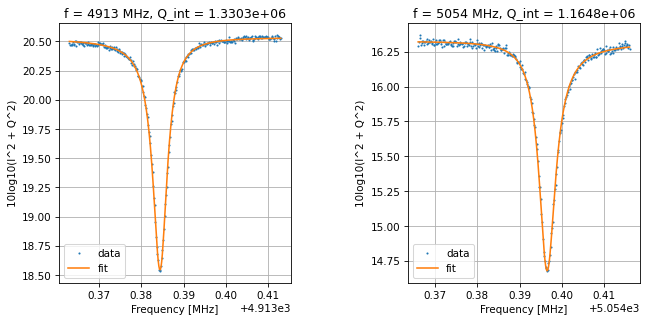

Resonator 0 freq: 4913.38451 MHz
Resonator 1 freq: 5054.39642 MHz


In [19]:
# Acquire
inputDict['power'] = inputDict['basePower']
Instance = mResSweepDouble.ResSweep(path=savePath, prefix='data', inputDict=inputDict, soc=soc, soccfg=soccfg)
data = mResSweepDouble.ResSweep.acquire(Instance)
pOpt, pCov = mResSweepDouble.ResSweep.display(Instance, data)

res_freq = [
    pOpt[0][0]/1e6, pOpt[1][0]/1e6
]

print('Resonator 0 freq: {0:0.5f} MHz'.format(res_freq[0]))
print('Resonator 1 freq: {0:0.5f} MHz'.format(res_freq[1]))

# Time domain parameters

In [22]:
inputDict['LO_f'] = 0  # local oscillator frequency
inputDict['res_f'] = res_freq  # center frequencies of the resonators
# inputDict['names'] = ['4p48', '4p72']
inputDict['names'] = ['4p91', '5p05']

# define numbers of points
inputDict['n_rounds'] = 1  # number of times to sweep along the frequency axis
inputDict['n_reps'] = 2000  # number of repetitions to take at each frequency point

ringTime = 500
inputDict['ring_up_time'] = ringTime  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 0.1  # time to average over
inputDict['relax_delay'] = 10*ringTime
inputDict['init_delay'] = ringTime/5
inputDict['t_delayArray'] = np.linspace(0, 2*ringTime+inputDict['init_delay'], 400)

inputDict['basePower'] = -30
inputDict['gain'] = [18000, 22000]

Instance = mResRingDownDouble.ResRingDown(prefix='Ringdown_t'+str(ringTime), 
                                          path=savePath, 
                                          inputDict=inputDict, 
                                          soc=soc, soccfg=soccfg)


Frequencies out are: [4913.384505944606, 5054.396415018094] MHz


In [ ]:
# decimated
# inputDict['init_delay'] = 0
# Instance = mResRingDownDouble.ResRingDown(prefix='Ringdown_t'+str(ringTime), 
#                                           path=savePath, 
#                                           inputDict=inputDict, 
#                                           soc=soc, soccfg=soccfg)
# data = Instance.acquire_decimated(readout_length=1000, adc_trig_offset=0)
# Instance.display_decimated(data)


In [ ]:
data = Instance.acquire()
Instance.display(data)
Instance.save_data()

  0%|          | 0/400 [00:00<?, ?it/s]